In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('auto-mpg.csv')  
print(df.head())


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('auto-mpg.csv')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna(subset=['horsepower'])

X = df[['horsepower']]  
y = df['mpg']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



In [9]:
def fit_and_plot(degree):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_scaled)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

   

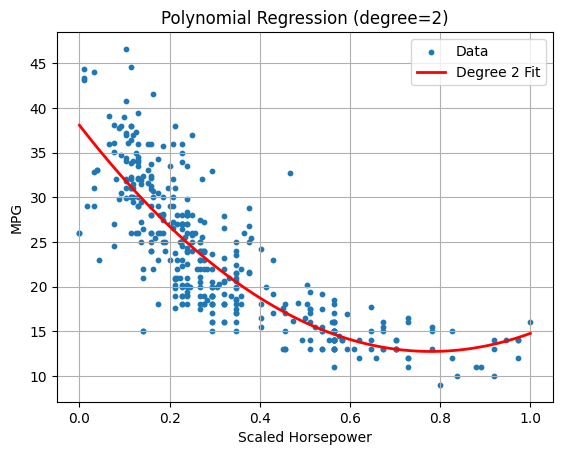

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

degree = 2  
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_scaled)  

model = LinearRegression()
model.fit(X_poly, y)

X_test = np.linspace(0, 1, 100).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_test_pred = model.predict(X_test_poly)

plt.scatter(X_scaled, y, s=10, label="Data")
plt.plot(X_test, y_test_pred, label=f"Degree {degree} Fit", linewidth=2, color='red')
plt.xlabel("Scaled Horsepower")
plt.ylabel("MPG")
plt.legend()
plt.title(f"Polynomial Regression (degree={degree})")
plt.grid(True)
plt.show()



In [13]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_poly)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Degree {degree} Regression - MSE: {mse:.2f}, R²: {r2:.2f}")


Degree 2 Regression - MSE: 18.98, R²: 0.69


In [ ]:
fit_and_plot(1)  
fit_and_plot(2)  
fit_and_plot(3)  
